<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_json('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Sarcasm_Headlines_Dataset.json',lines = True)
data.head(10)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


In [3]:
df = data.drop('article_link',axis  = 1)
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [4]:
r,c = df.shape
print("Number of Sentiments = ",r)
print("Number of parameters = ",c)

Number of Sentiments =  28619
Number of parameters =  2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
dtypes: int64(1), object(1)
memory usage: 447.3+ KB


In [6]:
df.isnull().sum()

is_sarcastic    0
headline        0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


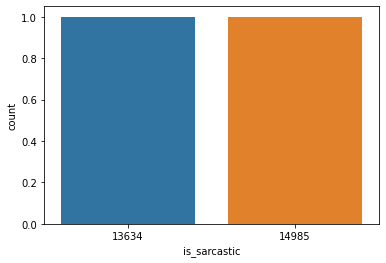

In [9]:
sns.countplot(df['is_sarcastic'].value_counts())
plt.show()

In [12]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import spacy
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
nlp = spacy.load('en_core_web_sm')
def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha() and lemma not in stopwords.words('english')]
    lemmatized_text = ' '.join(a_lemmas)
    return lemmatized_text
cleaned_text = []
for text in df.headline:
    cleaned_text.append(preprocess(text))
df['clean_text'] = cleaned_text
df.head()


,is_sarcastic,headline,clean_text
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientist unveil doomsday cloc...
1,0,dem rep. totally nails why congress is falling...,dem rep totally nail congress fall short gende...
2,0,eat your veggies: 9 deliciously different recipes,eat veggie deliciously different recipe
3,1,inclement weather prevents liar from getting t...,inclement weather prevent liar get work
4,1,mother comes pretty close to using word 'strea...,mother come pretty close use word streaming co...


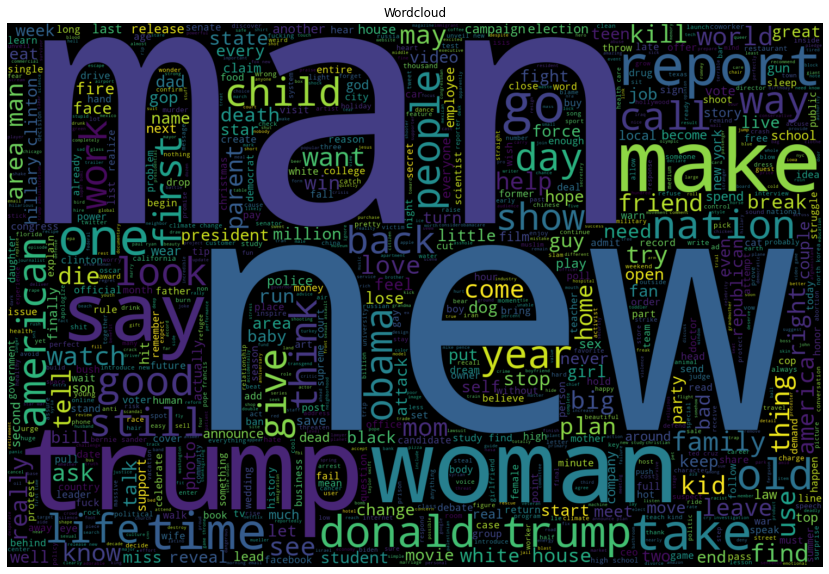

In [15]:
from wordcloud import WordCloud
plt.figure(figsize = (20,10))
wc = WordCloud(width = 1500,height = 1000,max_words = 1000).generate(' '.join(word for word in df.clean_text))
plt.axis("off")
plt.title('Wordcloud')
plt.imshow(wc , interpolation = 'bilinear')

In [16]:
X = df.clean_text
y = df.is_sarcastic

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)
tfidf = TfidfVectorizer(ngram_range = (1,3))
X_tfidf_train = tfidf.fit_transform(X_train.tolist())
X_tfidf_test = tfidf.transform(X_test.tolist())

In [20]:
X_train.head()

12170    american express offer month paternity materni...
28552       watch dolphin knocks stand paddleboarder board
6883                          man enjoy thing inform wrong
28387    jonathan lipnicki star young dark helmet space...
12932    publicist worry kanye west support trump damag...
Name: clean_text, dtype: object

In [21]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_tfidf_train,y_train)

LogisticRegression(class_weight='balanced')

In [22]:
y_pred_lr = lr.predict(X_tfidf_test)
print_metrices(y_pred_lr,y_test)

[[3472  983]
 [ 994 3137]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4455
           1       0.76      0.76      0.76      4131

    accuracy                           0.77      8586
   macro avg       0.77      0.77      0.77      8586
weighted avg       0.77      0.77      0.77      8586

Accuracy :  0.7697414395527603
Precison :  0.7697670226249201
Recall :  0.7697414395527603
F1 :  0.7697529670002048


In [23]:
clf_nb = MultinomialNB()
clf_nb.fit(X_tfidf_train,y_train)
y_pred_nb = clf_nb.predict(X_tfidf_test)
print_metrices(y_pred_nb,y_test)

[[3865  590]
 [1239 2892]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      4455
           1       0.83      0.70      0.76      4131

    accuracy                           0.79      8586
   macro avg       0.79      0.78      0.78      8586
weighted avg       0.79      0.79      0.79      8586

Accuracy :  0.7869788027020731
Precison :  0.7996392093257488
Recall :  0.7869788027020731
F1 :  0.7888272712569786


In [24]:
from sklearn.svm import LinearSVC
svc =  LinearSVC(C= 10,random_state=42,class_weight='balanced')
svc.fit(X_tfidf_train,y_train)
y_pred_svc = svc.predict(X_tfidf_test)
print_metrices(y_pred_svc,y_test)

[[3547  908]
 [ 900 3231]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      4455
           1       0.78      0.78      0.78      4131

    accuracy                           0.79      8586
   macro avg       0.79      0.79      0.79      8586
weighted avg       0.79      0.79      0.79      8586

Accuracy :  0.7894246447705567
Precison :  0.7894115546362934
Recall :  0.7894246447705567
F1 :  0.7894174138845986


In [25]:
clf_dt = DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=6, random_state=42)
clf_dt.fit(X_tfidf_train, y_train)
y_pred_dt = clf_dt.predict(X_tfidf_test)
print_metrices(y_pred_dt,y_test)

[[4295  160]
 [3315  816]]
              precision    recall  f1-score   support

           0       0.56      0.96      0.71      4455
           1       0.84      0.20      0.32      4131

    accuracy                           0.60      8586
   macro avg       0.70      0.58      0.52      8586
weighted avg       0.70      0.60      0.52      8586

Accuracy :  0.5952713720009317
Precison :  0.876948431960467
Recall :  0.5952713720009317
F1 :  0.6673695903833563


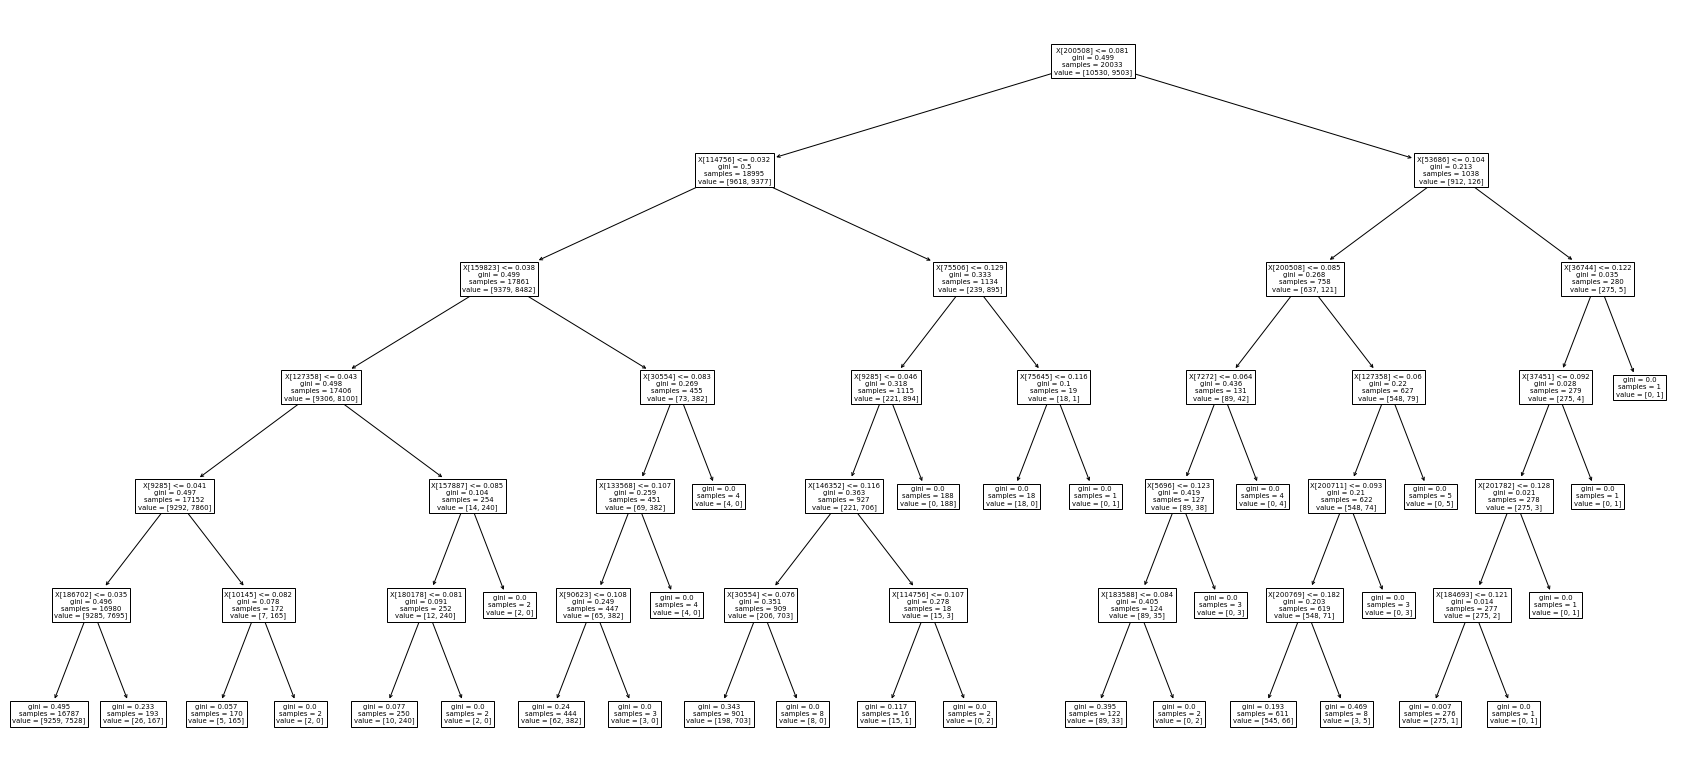

In [26]:
from sklearn import tree
plt.figure(figsize = (30,14))
tree.plot_tree(clf_dt)
plt.show()


In [27]:
clf_lr = LogisticRegression(class_weight='balanced')
clf_dt = DecisionTreeClassifier(class_weight='balanced')
clf_rf =   RandomForestClassifier(class_weight='balanced')
clf_svc = SVC(class_weight='balanced')


voting_clf = VotingClassifier(estimators=[('SVC', clf_svc), ('DecisionTree', clf_dt), ('LogReg', clf_lr),('RandromForest', clf_rf)], voting='hard')
voting_clf.fit(X_tfidf_train, y_train)
y_pred_ensemble = voting_clf.predict(X_tfidf_test)

In [28]:
print_metrices(y_pred_ensemble,y_test)

[[3935  520]
 [1759 2372]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.78      4455
           1       0.82      0.57      0.68      4131

    accuracy                           0.73      8586
   macro avg       0.76      0.73      0.73      8586
weighted avg       0.75      0.73      0.73      8586

Accuracy :  0.7345679012345679
Precison :  0.7791698963328108
Recall :  0.7345679012345679
F1 :  0.7417796037640576


[]

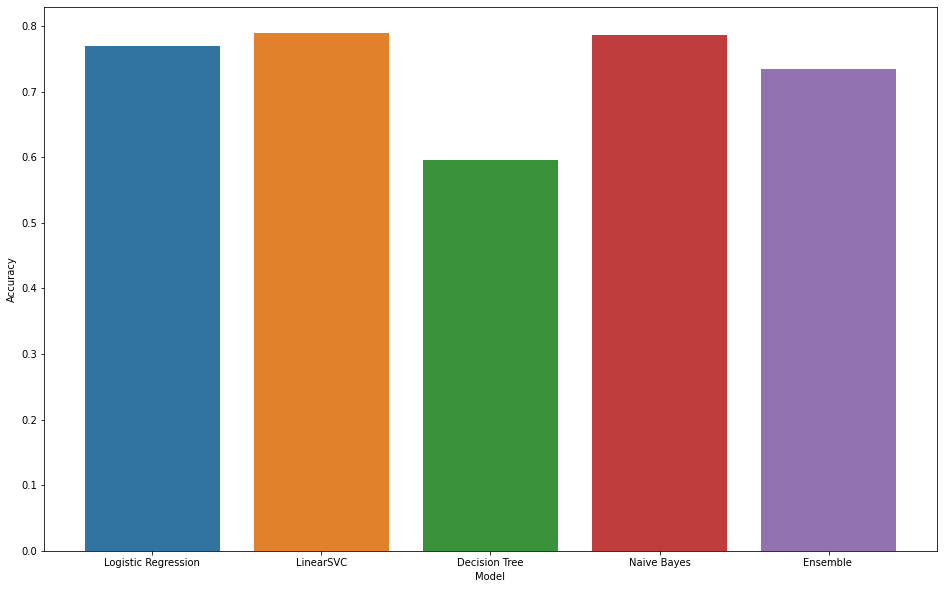

In [30]:
acc_table = {
    'Logistic Regression' : accuracy_score(y_pred_lr,y_test),
    'LinearSVC' : accuracy_score(y_pred_svc,y_test),
    'Decision Tree' : accuracy_score(y_pred_dt,y_test),
    'Naive Bayes' : accuracy_score(y_pred_nb,y_test),
    'Ensemble ': accuracy_score(y_pred_ensemble,y_test),
}
acc_df = pd.DataFrame(acc_table.items(),columns = ['Model','Accuracy'])
# fig, ax = plt.subplots()
plt.figure(figsize = (16,10))
sns.barplot(x=acc_df['Model'], y=acc_df['Accuracy'], data=acc_df)
plt.plot()

In [32]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_words = 1000
max_len = 100
tokenizer = Tokenizer(num_words = max_words,oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded_sequences = pad_sequences(train_sequences,maxlen = max_len,padding = 'post')

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded_sequences = pad_sequences(test_sequences,maxlen = max_len,padding = 'post')
print(train_sequences[0])
print(train_padded_sequences[0])

[64, 1, 236, 170, 1, 1, 77]
[ 64   1 236 170   1   1  77   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [33]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,GlobalAveragePooling1D
from keras.models import Model
from keras.models import Sequential
import numpy as np
training_padded = np.array(train_padded_sequences)
training_labels = np.array(y_train)
testing_padded = np.array(test_padded_sequences)
testing_labels = np.array(y_test)
vocab_size = 10000
embedding_dim = 16
Model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [34]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [35]:
num_epochs = 30
history = Model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)


Epoch 1/30
627/627 - 3s - loss: 0.6823 - accuracy: 0.5529 - val_loss: 0.6545 - val_accuracy: 0.6590 - 3s/epoch - 5ms/step
Epoch 2/30
627/627 - 2s - loss: 0.5921 - accuracy: 0.6939 - val_loss: 0.5563 - val_accuracy: 0.7169 - 2s/epoch - 4ms/step
Epoch 3/30
627/627 - 2s - loss: 0.5177 - accuracy: 0.7449 - val_loss: 0.5254 - val_accuracy: 0.7308 - 2s/epoch - 3ms/step
Epoch 4/30
627/627 - 2s - loss: 0.4902 - accuracy: 0.7580 - val_loss: 0.5168 - val_accuracy: 0.7364 - 2s/epoch - 4ms/step
Epoch 5/30
627/627 - 2s - loss: 0.4818 - accuracy: 0.7623 - val_loss: 0.5149 - val_accuracy: 0.7369 - 2s/epoch - 4ms/step
Epoch 6/30
627/627 - 2s - loss: 0.4739 - accuracy: 0.7654 - val_loss: 0.5174 - val_accuracy: 0.7386 - 2s/epoch - 4ms/step
Epoch 7/30
627/627 - 2s - loss: 0.4713 - accuracy: 0.7665 - val_loss: 0.5157 - val_accuracy: 0.7350 - 2s/epoch - 4ms/step
Epoch 8/30
627/627 - 2s - loss: 0.4683 - accuracy: 0.7700 - val_loss: 0.5162 - val_accuracy: 0.7363 - 2s/epoch - 4ms/step
Epoch 9/30
627/627 - 2s 

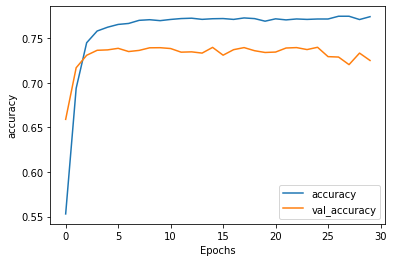

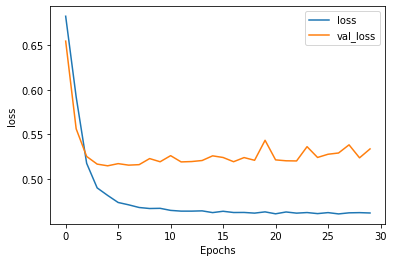

In [36]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")